### Full Mandi market data of Punjab State

In [7]:
import pandas as pd
df=pd.read_csv('Wheat data.csv')
df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Punjab,Fazilka,Abohar,Other,Cereals,100,2130.0,2130,2130,26-May-23
1,Punjab,Fazilka,Abohar,Other,Cereals,136,2125.0,2125,2125,25-May-23
2,Punjab,Fazilka,Abohar,Other,Cereals,256,2125.0,2130,2125,24-May-23
3,Punjab,Fazilka,Abohar,Other,Cereals,270,2125.0,2130,2125,23-May-23
4,Punjab,Fazilka,Abohar,Other,Cereals,474,2125.0,2130,2125,22-May-23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667 entries, 0 to 5666
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 5667 non-null   object        
 1   District Name              5667 non-null   object        
 2   Market Name                5667 non-null   object        
 3   Variety                    5667 non-null   object        
 4   Group                      5667 non-null   object        
 5   Arrivals (Tonnes)          5659 non-null   object        
 6   Min Price (Rs./Quintal)    5667 non-null   float64       
 7   Max Price (Rs./Quintal)    5667 non-null   int64         
 8   Modal Price (Rs./Quintal)  5667 non-null   int64         
 9   Reported Date              5667 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 442.9+ KB


In [43]:
df['Variety'].value_counts()

Other          4503
147 Average     477
Local           219
Medium          164
147 Best        104
Hybrid           75
PBW-343          17
Super Fine        8
343               4
Name: Variety, dtype: int64

In [8]:
#converting to date time
df['Reported Date']=pd.to_datetime(df['Reported Date'],format="%d-%b-%y")

In [9]:
#creating year column from Reported Date
df['year']=df['Reported Date'].dt.year

In [10]:
#converting the Arrival value into numerical
df['Arrivals (Tonnes)']=df['Arrivals (Tonnes)'].str.replace(',','').astype(float)

In [11]:
# Converting the Arrivals Tonnes into Quintals
df['Arrivals (Quintals)']=df['Arrivals (Tonnes)']*10

In [18]:
df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,year,Arrivals (Quintals)
0,Punjab,Fazilka,Abohar,Other,Cereals,100.0,2130.0,2130,2130,2023-05-26,2023,1000.0
1,Punjab,Fazilka,Abohar,Other,Cereals,136.0,2125.0,2125,2125,2023-05-25,2023,1360.0
2,Punjab,Fazilka,Abohar,Other,Cereals,256.0,2125.0,2130,2125,2023-05-24,2023,2560.0
3,Punjab,Fazilka,Abohar,Other,Cereals,270.0,2125.0,2130,2125,2023-05-23,2023,2700.0
4,Punjab,Fazilka,Abohar,Other,Cereals,474.0,2125.0,2130,2125,2023-05-22,2023,4740.0


In [17]:
#detecting outlier
import pandas as pd
import numpy as np

def detect_outliers_z_score(data, threshold=3):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    
    for i, value in enumerate(data):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    return outliers
for i in df.columns:
    if df[i].dtype!='object' and 'datetime64[ns]':
        outliers=detect_outliers_z_score(df[i])
        print(f'outliers for the column {i}:\n {outliers}')

outliers for the column Arrivals (Tonnes):
 [1219, 1478, 1479, 1665, 1891, 1892, 1893, 1895, 1896, 1898, 1899, 1900, 1907, 1910, 1912, 1913, 1914, 1915, 1919, 1920, 1921, 2494, 2757, 2837, 2838, 2839, 2880, 2881, 2882, 2887, 2911, 2912, 2914, 2915, 2916, 2919, 2920, 2921, 2922, 2923, 3059, 3060, 3061, 3062, 3110, 3589, 3650, 3651, 3652, 3653, 3656, 3708, 3709, 3779, 3780, 5080, 5466, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5619, 5620, 5621, 5627, 5628, 5629, 5630, 5631, 5632, 5634, 5635, 5636, 5637, 5638, 5648, 5650, 5651, 5652, 5653, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664]
outliers for the column Min Price (Rs./Quintal):
 [2925, 2926, 2927, 2928, 2929, 2930, 5311, 5596]
outliers for the column Max Price (Rs./Quintal):
 [83, 1379, 2081, 2186, 2427, 2925, 2926, 2927, 2928, 2929, 2930, 5311, 5596]
outliers for the column Modal Price (Rs./Quintal):
 [2186, 2925, 2926, 2927, 2928, 2929, 2930, 5311, 5596]
outliers for the column Reported Date:
 []
out

In [22]:
def remove_outliers_z_score(df, column_names, threshold=3):
    for column_name in column_names:
        data = df[column_name]
        outliers_indices = detect_outliers_z_score(data, threshold)
        df_cleaned = df.drop(outliers_indices)
    return df_cleaned
outlier_columns=['Arrivals (Tonnes)','Arrivals (Quintals)']
df=remove_outliers_z_score(df,outlier_columns)

In [23]:
#The data we are taking is only about punjab, so we can delete the state column
df.drop('State Name',axis=1,inplace=True)

In [47]:
# Droping the column groups since it has only one value cereals
df.drop('Group',axis=1,inplace=True)

### Hoshiarpur, Jalandhar, Kapurthala, Ludhiana

In [24]:
df['District Name'].unique()

array(['Fazilka', 'Jalandhar', 'Moga', 'Sangrur', 'Fatehgarh', 'Amritsar',
       'Nawanshahr', 'Mohali', 'Mansa', 'Muktsar', 'Barnala', 'Patiala',
       'Bhatinda', 'kapurthala', 'Tarntaran', 'Hoshiarpur', 'Gurdaspur',
       'Faridkot', 'Ferozpur', 'Ludhiana', 'Ropar (Rupnagar)'],
      dtype=object)

In [48]:
my_data = df[df['District Name'].isin(['Hoshiarpur', 'Jalandhar', 'kapurthala', 'Ludhiana'])]
my_data.head()

,District Name,Market Name,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,year,Arrivals (Quintals)
127,Jalandhar,Adampur,Other,1081.4,1975.0,1975,1975,2021-05-07,2021,10814.0
128,Jalandhar,Adampur,Other,76.6,1975.0,1975,1975,2021-05-05,2021,766.0
129,Jalandhar,Adampur,Other,83.2,1975.0,1975,1975,2021-05-04,2021,832.0
130,Jalandhar,Adampur,Other,2556.6,1975.0,1975,1975,2021-04-30,2021,25566.0
131,Jalandhar,Adampur,Other,620.4,1975.0,1975,1975,2021-04-28,2021,6204.0


In [26]:
my_data['District Name'].unique()

array(['Jalandhar', 'kapurthala', 'Hoshiarpur', 'Ludhiana'], dtype=object)

In [49]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 127 to 5424
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              1079 non-null   object        
 1   Market Name                1079 non-null   object        
 2   Variety                    1079 non-null   object        
 3   Arrivals (Tonnes)          1079 non-null   float64       
 4   Min Price (Rs./Quintal)    1079 non-null   float64       
 5   Max Price (Rs./Quintal)    1079 non-null   int64         
 6   Modal Price (Rs./Quintal)  1079 non-null   int64         
 7   Reported Date              1079 non-null   datetime64[ns]
 8   year                       1079 non-null   int64         
 9   Arrivals (Quintals)        1079 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 92.7+ KB


In [27]:
my_data['Market Name'].unique()

array(['Adampur', 'Bhulath', 'Bhulath (Ibrahimaaaaval)',
       'Bhulath (Nadala)', 'Bilga', 'Bilga (Talwan )', 'Dasuya',
       'Dhilwan', 'Garh Shankar', 'Garh Shankar(Mahalpur)',
       'GarhShankar (Kotfatuhi)', 'Garhshankar(Saila Khurd)', 'Hathur',
       'Jagraon', 'Jalandhar Cantt (Jamshedpur Dana Mandi)',
       'Jalandhar Cantt.', 'Jalandhar City',
       'Jalandhar City(Faintan Ganj)',
       'Jalandhar City(Kartar Pur Dana mandi)', 'Machhiwara', 'Mehatpur',
       'Mullanpur', 'Mullanpur Dakha (Sawadi)', 'Nakodar',
       'Nakodar(Sarih)', 'Noor Mehal', 'Noor Mehal(Kot Badal Khan)',
       'Phillaur', 'Phillaur(Apra Mandi)', 'Sahnewal', 'Samrala',
       'Shahkot', 'Shakot (Malsian)', 'Sidhwan Bet',
       'Sidhwan Bet (Lodhiwala)', 'Sultanpur', 'Sultanpur Lodhi (Tibba)'],
      dtype=object)

In [28]:
pivot_df=my_data.pivot_table(index='District Name', columns='year', values='Arrivals (Tonnes)', aggfunc='sum')
pivot_df.head()

year,2021,2022,2023
District Name,,,
Hoshiarpur,49243.00,45835.0,25612.00
Jalandhar,278762.02,283834.5,157899.80
Ludhiana,285368.66,205606.5,165243.65
kapurthala,149279.35,60449.6,42069.80


In [33]:
# Arrivals of 
import plotly.graph_objects as go
pivot_df =my_data.pivot_table(index='District Name', columns='year', values='Arrivals (Quintals)', aggfunc='sum')
# Plot grouped bars using Plotly
fig = go.Figure()

for col in pivot_df.columns:
    fig.add_trace(go.Bar(name=str(col), x=pivot_df.index, y=pivot_df[col]))

# Update layout
fig.update_layout(barmode='group', xaxis_title='District Name', yaxis_title='Arrivals (Tonnes)',
                  title='Arrivals (Quintals) by District name and Year')

# Save the plot in html format
fig.write_html('Wheat Collected in Quintals.html')
#show the plot
fig.show()

### Observations
### ***************
#### 1. In the year 2021, the highest wheat collected in tonnes is the Jalandhar district out of Jalandhar, kapurthala, Hoshiarpur, Ludhiana.
#### 2. In the year 2022, the highest wheat collected in tonnes is the Jalandhar district out of Jalandhar, kapurthala, Hoshiarpur, Ludhiana.
#### 3. In the year 2023, the highest wheat collected in tonnes is the Ludhiana district out of Jalandhar, kapurthala, Hoshiarpur, Ludhiana.
#### 4. Hoshiarpur is having the less amount of wheat collected comparing with the other districts.

# Jalandhar District

In [41]:
jalandhar=my_data[my_data['District Name'].isin(['Jalandhar'])]
jalandhar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 127 to 5109
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              467 non-null    object        
 1   Market Name                467 non-null    object        
 2   Variety                    467 non-null    object        
 3   Group                      467 non-null    object        
 4   Arrivals (Tonnes)          467 non-null    float64       
 5   Min Price (Rs./Quintal)    467 non-null    float64       
 6   Max Price (Rs./Quintal)    467 non-null    int64         
 7   Modal Price (Rs./Quintal)  467 non-null    int64         
 8   Reported Date              467 non-null    datetime64[ns]
 9   year                       467 non-null    int64         
 10  Arrivals (Quintals)        467 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 

In [42]:
jalandhar.head()

,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,year,Arrivals (Quintals)
127,Jalandhar,Adampur,Other,Cereals,1081.4,1975.0,1975,1975,2021-05-07,2021,10814.0
128,Jalandhar,Adampur,Other,Cereals,76.6,1975.0,1975,1975,2021-05-05,2021,766.0
129,Jalandhar,Adampur,Other,Cereals,83.2,1975.0,1975,1975,2021-05-04,2021,832.0
130,Jalandhar,Adampur,Other,Cereals,2556.6,1975.0,1975,1975,2021-04-30,2021,25566.0
131,Jalandhar,Adampur,Other,Cereals,620.4,1975.0,1975,1975,2021-04-28,2021,6204.0


In [18]:
jalandhar['Market Name'].unique()

array(['Adampur', 'Bilga', 'Bilga (Talwan )',
       'Jalandhar Cantt (Jamshedpur Dana Mandi)', 'Jalandhar Cantt.',
       'Jalandhar City', 'Jalandhar City(Faintan Ganj)',
       'Jalandhar City(Kartar Pur Dana mandi)', 'Mehatpur', 'Nakodar',
       'Nakodar(Sarih)', 'Noor Mehal', 'Noor Mehal(Kot Badal Khan)',
       'Phillaur', 'Phillaur(Apra Mandi)', 'Shahkot', 'Shakot (Malsian)'],
      dtype=object)

In [23]:
jalandhar['Group'].unique()

array(['Cereals'], dtype=object)

In [62]:
jalandhar['Reported Date'].dt.year.unique()

array([2021, 2022, 2023], dtype=int64)

### Min price and max price per Quintal in the year 2021

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

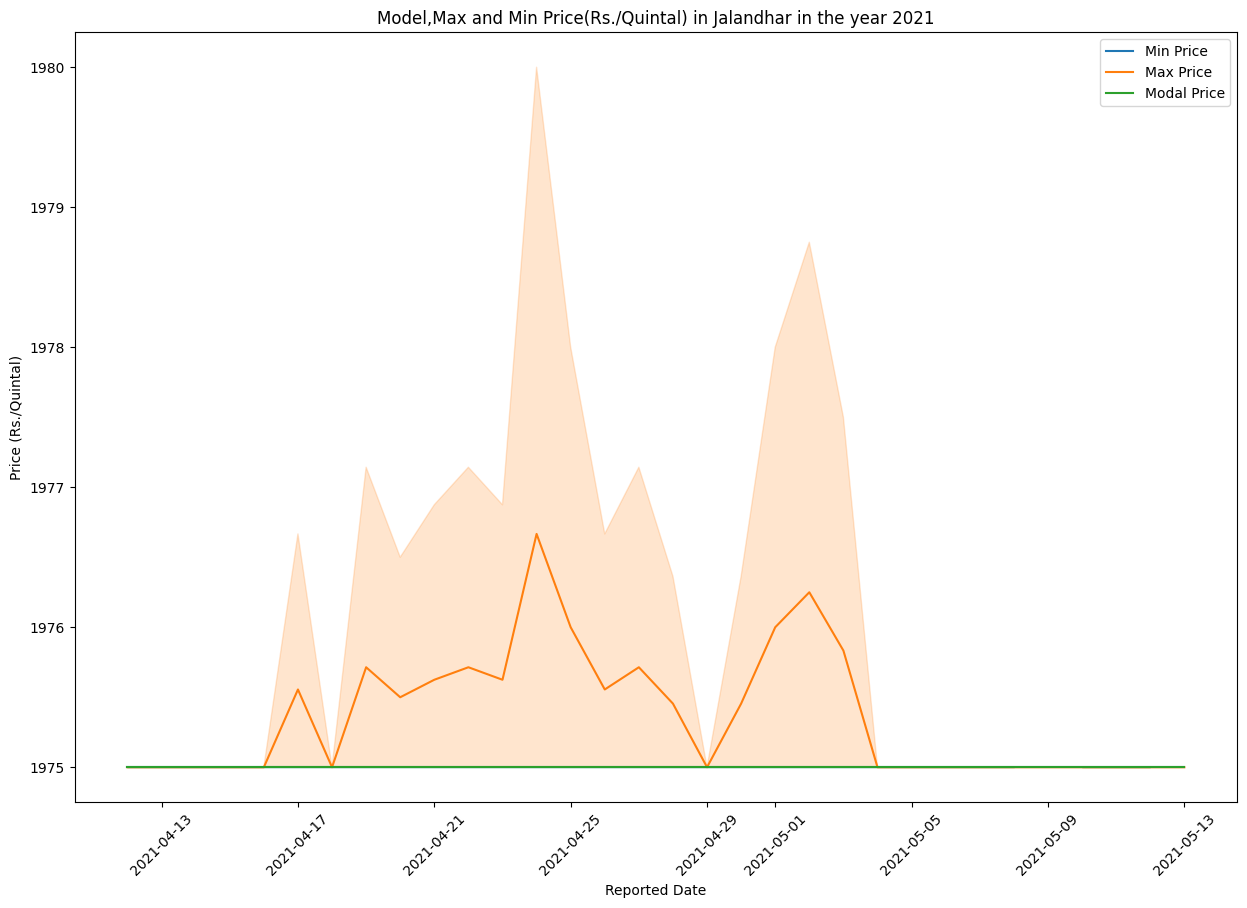

In [54]:
plt.figure(figsize=(15, 10))

# Plot Min Price
sns.lineplot(x='Reported Date', y='Min Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2021], label='Min Price')

# Plot Max Price
sns.lineplot(x='Reported Date', y='Max Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2021], label='Max Price')

# Plot Modal Price
sns.lineplot(x='Reported Date', y='Modal Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2021], label='Modal Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Model,Max and Min Price(Rs./Quintal) in Jalandhar in the year 2021')
plt.xlabel('Reported Date')
plt.ylabel('Price (Rs./Quintal)')

# Show legend
plt.legend()

plt.show()

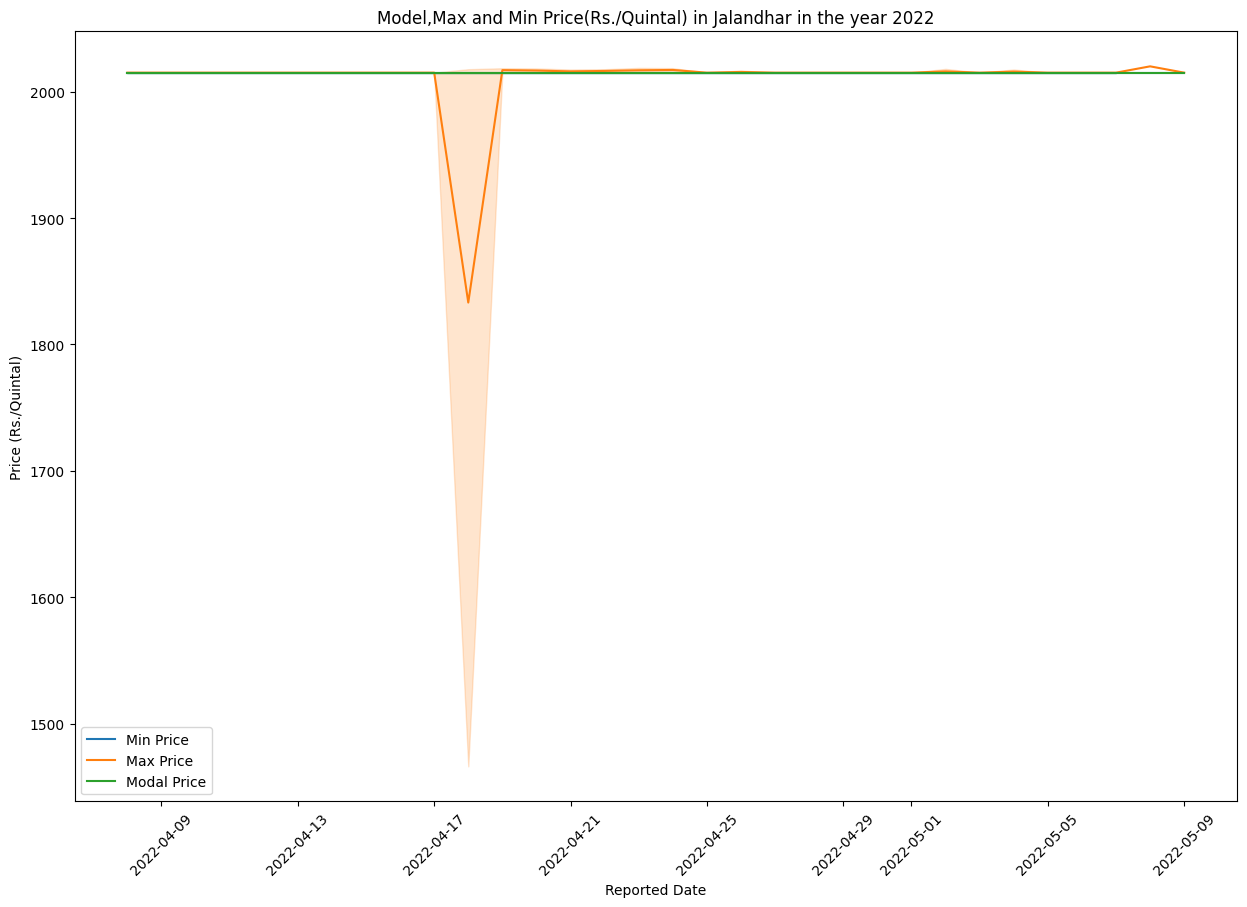

In [55]:
plt.figure(figsize=(15, 10))

# Plot Min Price
sns.lineplot(x='Reported Date', y='Min Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2022], label='Min Price')

# Plot Max Price
sns.lineplot(x='Reported Date', y='Max Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2022], label='Max Price')

# Plot Modal Price
sns.lineplot(x='Reported Date', y='Modal Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2022], label='Modal Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Model,Max and Min Price(Rs./Quintal) in Jalandhar in the year 2022')
plt.xlabel('Reported Date')
plt.ylabel('Price (Rs./Quintal)')

# Show legend
plt.legend()

plt.show()

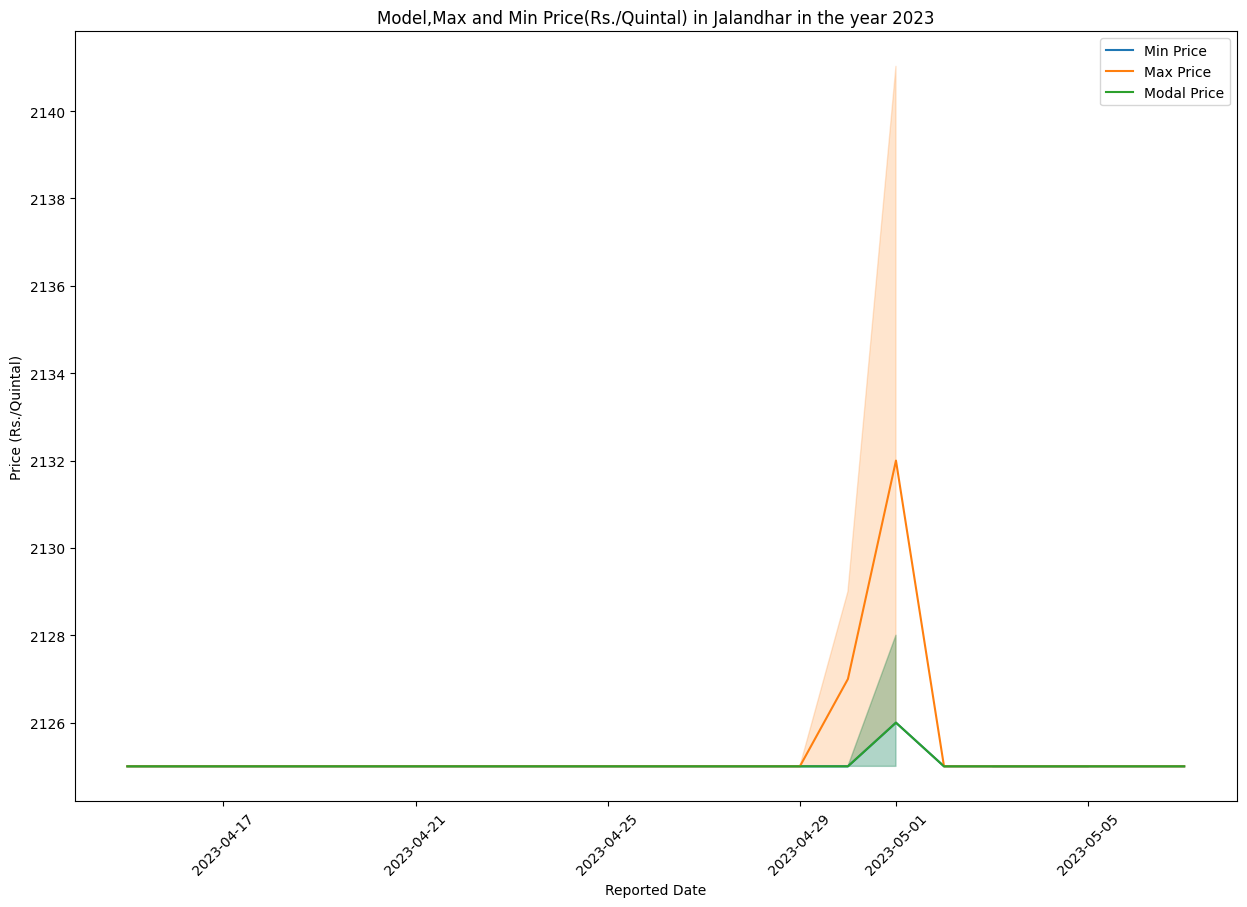

In [56]:
plt.figure(figsize=(15, 10))

# Plot Min Price
sns.lineplot(x='Reported Date', y='Min Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2023], label='Min Price')

# Plot Max Price
sns.lineplot(x='Reported Date', y='Max Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2023], label='Max Price')

# Plot Modal Price
sns.lineplot(x='Reported Date', y='Modal Price (Rs./Quintal)', data=jalandhar[jalandhar['Reported Date'].dt.year==2023], label='Modal Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Model,Max and Min Price(Rs./Quintal) in Jalandhar in the year 2023')
plt.xlabel('Reported Date')
plt.ylabel('Price (Rs./Quintal)')

# Show legend
plt.legend()

plt.show()

### Observations
### ***************
#### 1. In the case of years 2022 and 2023, model,max and min price in Rs.\Quintal doesn't show much fluctuations.
#### 2. In the case of year 2021 there are significant fluctuation in the max price whereas model and min price shows same pattern as previous years.

# ********************************************************

In [57]:
jalandhar.head()

,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,year,Arrivals (Quintals)
127,Jalandhar,Adampur,Other,Cereals,1081.4,1975.0,1975,1975,2021-05-07,2021,10814.0
128,Jalandhar,Adampur,Other,Cereals,76.6,1975.0,1975,1975,2021-05-05,2021,766.0
129,Jalandhar,Adampur,Other,Cereals,83.2,1975.0,1975,1975,2021-05-04,2021,832.0
130,Jalandhar,Adampur,Other,Cereals,2556.6,1975.0,1975,1975,2021-04-30,2021,25566.0
131,Jalandhar,Adampur,Other,Cereals,620.4,1975.0,1975,1975,2021-04-28,2021,6204.0


In [68]:
jalandhar.groupby('Market Name').agg({'Arrivals (Quintals)':'sum'}).reset_index().sort_values(by='Arrivals (Quintals)')

,Market Name,Arrivals (Quintals)
14,Phillaur(Apra Mandi),1144.0
13,Phillaur,3300.0
6,Jalandhar City(Faintan Ganj),3783.0
10,Nakodar(Sarih),21386.0
16,Shakot (Malsian),47127.0
8,Mehatpur,77710.0
0,Adampur,86484.0
12,Noor Mehal(Kot Badal Khan),137488.0
7,Jalandhar City(Kartar Pur Dana mandi),245722.0
5,Jalandhar City,257181.0


In [50]:
sum_tonnes_market.columns

Index(['Market Name', 'Arrivals (Tonnes)'], dtype='object')

In [72]:
import plotly.express as px
# Create a bar plot using Plotly
sum_tonnes_market = jalandhar.groupby('Market Name')['Arrivals (Quintals)'].sum().reset_index().sort_values(by='Arrivals (Quintals)')
fig = px.bar(sum_tonnes_market, x='Arrivals (Quintals)', y='Market Name', orientation='h',
             title='Sum of Arrivals (Quintals)) by Market Name',
             color='Arrivals (Quintals)',
             color_continuous_scale='viridis')
# Add text annotations to the bars
for i in range(len(sum_tonnes_market)):
    fig.add_annotation(x=sum_tonnes_market['Arrivals (Quintals)'][i], y=sum_tonnes_market['Market Name'][i],
                       text=str(sum_tonnes_market['Arrivals (Quintals)'][i]), showarrow=False, xshift=5)

# Show the plot
fig.show()
fig.write_html('Sum of Arrivals (Quintal) by Market Name.html')

### Observations
### ***************
#### 1. Maximum tonnes of wheat arrived at Shahkot market with a value of 260629 from the year 2021-2023.
#### 2. Minimum tonnes of wheat arrived at Phillaur(Apra Mandi) with a value of 114.4 from the year 2021-2023.


### ************************************

In [83]:
jalandhar.head()

,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,year,Arrivals (Quintals)
127,Jalandhar,Adampur,Other,Cereals,1081.4,1975.0,1975,1975,2021-05-07,2021,10814.0
128,Jalandhar,Adampur,Other,Cereals,76.6,1975.0,1975,1975,2021-05-05,2021,766.0
129,Jalandhar,Adampur,Other,Cereals,83.2,1975.0,1975,1975,2021-05-04,2021,832.0
130,Jalandhar,Adampur,Other,Cereals,2556.6,1975.0,1975,1975,2021-04-30,2021,25566.0
131,Jalandhar,Adampur,Other,Cereals,620.4,1975.0,1975,1975,2021-04-28,2021,6204.0


In [64]:
Shahkot=jalandhar[jalandhar['Market Name']=='Shahkot']
Shahkot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 5052 to 5081
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 30 non-null     object        
 1   District Name              30 non-null     object        
 2   Market Name                30 non-null     object        
 3   Variety                    30 non-null     object        
 4   Group                      30 non-null     object        
 5   Arrivals (Tonnes)          30 non-null     float64       
 6   Min Price (Rs./Quintal)    30 non-null     float64       
 7   Max Price (Rs./Quintal)    30 non-null     int64         
 8   Modal Price (Rs./Quintal)  30 non-null     int64         
 9   Reported Date              30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [72]:
Shahkot_market.year.unique()

array([2023, 2022], dtype=int64)

In [74]:
import plotly.graph_objects as go
pivot_df =jalandhar.pivot_table(index='Market Name', columns='year', values='Arrivals (Quintals)', fill_value=0)
# Plot grouped bars using Plotly
fig = go.Figure()

for col in pivot_df.columns:
    fig.add_trace(go.Bar(name=str(col), x=pivot_df.index, y=pivot_df[col]))

# Update layout
fig.update_layout(barmode='group', xaxis_title='Market Name', yaxis_title='Arrivals (Tonnes)',
                  title='Arrivals (Quintals) by Market Name and Year')

# Show plot
fig.show()
fig.write_html('Arrivals (Quintals) by Market Name and Year.html')

### Observations
### ***************
#### 1. The all the markets are having very less values in the year 2023 compared to the year.
#### 2. The highest value of wheat collected in the market Nakodar in the year 2022 of value 120.285 K quintals

In [82]:
import plotly.graph_objs as go

shahkot=jalandhar[jalandhar['Market Name']=='Shahkot']
# Create a line plot
fig = go.Figure()

# Add trace for the line plot
fig.add_trace(go.Scatter(x=shahkot['Reported Date'], y=shahkot['Arrivals (Quintals)'], mode='lines', name='Data'))

# Update layout
fig.update_layout(title='Line Plot of Data over Time',
                  xaxis_title='Month',
                  yaxis_title='Data Value')

# Show the plot
fig.show()

# ************************************************************

# kapurthala

In [85]:
kapurthala=my_data[my_data['District Name']=='kapurthala']
kapurthala.head()

,District Name,Market Name,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,year,Arrivals (Quintals)
1114,kapurthala,Bhulath,Other,10.1,1975.0,1975,1975,2021-05-12,2021,101.0
1115,kapurthala,Bhulath,Other,94.0,1975.0,1975,1975,2021-05-08,2021,940.0
1116,kapurthala,Bhulath,Other,357.1,1975.0,1975,1975,2021-05-07,2021,3571.0
1117,kapurthala,Bhulath,Other,180.7,1975.0,1975,1975,2021-05-05,2021,1807.0
1118,kapurthala,Bhulath,Other,275.8,1975.0,1975,1975,2021-05-04,2021,2758.0


In [77]:
year_wise_tonnes_shahkot=Shahkot_market.groupby('year').agg({'Arrivals (Tonnes)':'sum'}).reset_index()

,year,Arrivals (Tonnes)
0,2022,117623.0
1,2023,143006.0


In [90]:
import plotly.graph_objects as go

# Filter data for the year 2021
data_2021 = kapurthala[kapurthala['Reported Date'].dt.year == 2021]

# Create traces for each line
trace_min_price = go.Scatter(x=data_2021['Reported Date'], y=data_2021['Min Price (Rs./Quintal)'],
                             mode='lines', name='Min Price')

trace_max_price = go.Scatter(x=data_2021['Reported Date'], y=data_2021['Max Price (Rs./Quintal)'],
                             mode='lines', name='Max Price')

trace_modal_price = go.Scatter(x=data_2021['Reported Date'], y=data_2021['Modal Price (Rs./Quintal)'],
                               mode='lines', name='Modal Price')

# Create figure and add traces
fig = go.Figure()
fig.add_trace(trace_min_price)
fig.add_trace(trace_max_price)
fig.add_trace(trace_modal_price)

# Update layout
fig.update_layout(
    title='Modal, Max, and Min Price (Rs./Quintal) in kapurthala in the year 2021',
    xaxis_title='Reported Date',
    yaxis_title='Price (Rs./Quintal)',
    xaxis=dict(tickangle=45)
)

# Show plot
fig.show()
fig.write_html('Price (Rs. per Quintal) in kapurthala in the year 2021.html')

In [92]:
import plotly.graph_objects as go

# Filter data for the year 2021
data_2022 = kapurthala[kapurthala['Reported Date'].dt.year == 2022]

# Create traces for each line
trace_min_price = go.Scatter(x=data_2022['Reported Date'], y=data_2022['Min Price (Rs./Quintal)'],
                             mode='lines', name='Min Price')

trace_max_price = go.Scatter(x=data_2022['Reported Date'], y=data_2022['Max Price (Rs./Quintal)'],
                             mode='lines', name='Max Price')

trace_modal_price = go.Scatter(x=data_2022['Reported Date'], y=data_2022['Modal Price (Rs./Quintal)'],
                               mode='lines', name='Modal Price')

# Create figure and add traces
fig = go.Figure()
fig.add_trace(trace_min_price)
fig.add_trace(trace_max_price)
fig.add_trace(trace_modal_price)

# Update layout
fig.update_layout(
    title='Modal, Max, and Min Price (Rs./Quintal) in kapurthala in the year 2021',
    xaxis_title='Reported Date',
    yaxis_title='Price (Rs./Quintal)',
    xaxis=dict(tickangle=45)
)

# Show plot
fig.show()
fig.write_html('Modal, Max, and Min Price (Rs. per Quintal) in kapurthala in the year 2021.html')

In [93]:
import plotly.graph_objects as go

# Filter data for the year 2021
data_2023 = kapurthala[kapurthala['Reported Date'].dt.year == 2023]

# Create traces for each line
trace_min_price = go.Scatter(x=data_2023['Reported Date'], y=data_2023['Min Price (Rs./Quintal)'],
                             mode='lines', name='Min Price')

trace_max_price = go.Scatter(x=data_2023['Reported Date'], y=data_2023['Max Price (Rs./Quintal)'],
                             mode='lines', name='Max Price')

trace_modal_price = go.Scatter(x=data_2023['Reported Date'], y=data_2023['Modal Price (Rs./Quintal)'],
                               mode='lines', name='Modal Price')

# Create figure and add traces
fig = go.Figure()
fig.add_trace(trace_min_price)
fig.add_trace(trace_max_price)
fig.add_trace(trace_modal_price)

# Update layout
fig.update_layout(
    title='Modal, Max, and Min Price (Rs./Quintal) in kapurthala in the year 2021',
    xaxis_title='Reported Date',
    yaxis_title='Price (Rs./Quintal)',
    xaxis=dict(tickangle=45)
)

# Show plot
fig.show()
fig.write_html('Modal, Max, and Min Price (Rs.per Quintal) in kapurthala in the year 2021')

In [104]:
import plotly.express as px
sum_tonnes_market=kapurthala.groupby('Market Name')['Arrivals (Quintals)'].sum().reset_index().sort_values(by='Arrivals (Quintals)')
# Create a bar plot using Plotly
fig = px.bar(sum_tonnes_market, x='Arrivals (Quintals)', y='Market Name', orientation='h',
             title='Sum of Arrivals (Quintals) by Market Name in kapurthala',
             color='Arrivals (Quintals)',
             color_continuous_scale='viridis')
# Add text annotations to the bars
for i in range(len(sum_tonnes_market)):
    fig.add_annotation(x=sum_tonnes_market['Arrivals (Quintals)'][i], y=sum_tonnes_market['Market Name'][i],
                       text=str(sum_tonnes_market['Arrivals (Quintals)'][i]), showarrow=False, xshift=5)

# Show the plot
fig.show()
fig.write_html('Sum of Arrivals (Quintals) by Market Name in kapurthala.html')


### Observations
### ***************
#### 1. The maximum wheat in tonnes is collected in the Dhilwan market in the year 2021-23
#### 2. The minimum wheat in tonnes is collected in the Bhulath (Ibrahimaaaaval) market in the year 2021-23

In [106]:
import plotly.graph_objects as go
pivot_df =kapurthala.pivot_table(index='Market Name', columns='year', values='Arrivals (Quintals)', fill_value=0)
# Plot grouped bars using Plotly
fig = go.Figure()

for col in pivot_df.columns:
    fig.add_trace(go.Bar(name=str(col), x=pivot_df.index, y=pivot_df[col]))

# Update layout
fig.update_layout(barmode='group', xaxis_title='Market Name', yaxis_title='Arrivals (Quintals)',
                  title='Arrivals (Quintals) by Market Name and Year in kapurthala')

# Show plot
fig.show()
fig.write_html('Arrivals (Quintals) by Market Name and Year in kapurthala.html')

### Observations
### ***************
#### 1. The highest wheat collected is in Sultanpur market with a value of 43.624 K quintals in the year 2022.

# Ludhiana

In [107]:
ludhiana=my_data[my_data['District Name'].isin(['Ludhiana'])]
ludhiana.head()

,District Name,Market Name,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,year,Arrivals (Quintals)
2123,Ludhiana,Hathur,Other,51.0,2125.0,2125,2125,2023-05-11,2023,510.0
2124,Ludhiana,Hathur,Other,109.0,2125.0,2125,2125,2023-05-09,2023,1090.0
2125,Ludhiana,Hathur,Other,102.0,2125.0,2125,2125,2023-05-06,2023,1020.0
2126,Ludhiana,Hathur,Other,131.0,2125.0,2125,2125,2023-05-05,2023,1310.0
2127,Ludhiana,Hathur,Other,150.0,2125.0,2125,2125,2023-05-04,2023,1500.0


In [108]:
import plotly.graph_objects as go

# Filter data for the year 2021
data_2021 = ludhiana[ludhiana['Reported Date'].dt.year == 2021]

# Create traces for each line
trace_min_price = go.Scatter(x=data_2021['Reported Date'], y=data_2021['Min Price (Rs./Quintal)'],
                             mode='lines', name='Min Price')

trace_max_price = go.Scatter(x=data_2021['Reported Date'], y=data_2021['Max Price (Rs./Quintal)'],
                             mode='lines', name='Max Price')

trace_modal_price = go.Scatter(x=data_2021['Reported Date'], y=data_2021['Modal Price (Rs./Quintal)'],
                               mode='lines', name='Modal Price')

# Create figure and add traces
fig = go.Figure()
fig.add_trace(trace_min_price)
fig.add_trace(trace_max_price)
fig.add_trace(trace_modal_price)

# Update layout
fig.update_layout(
    title='Modal, Max, and Min Price (Rs./Quintal) in ludhiana in the year 2021',
    xaxis_title='Reported Date',
    yaxis_title='Price (Rs./Quintal)',
    xaxis=dict(tickangle=45)
)

# Show plot
fig.show()
fig.write_html('Price (Rs. per Quintal) in ludhiana in the year 2021.html')

In [110]:
import plotly.graph_objects as go

# Filter data for the year 2021
data = ludhiana[ludhiana['Reported Date'].dt.year == 2022]

# Create traces for each line
trace_min_price = go.Scatter(x=data['Reported Date'], y=data['Min Price (Rs./Quintal)'],
                             mode='lines', name='Min Price')

trace_max_price = go.Scatter(x=data['Reported Date'], y=data['Max Price (Rs./Quintal)'],
                             mode='lines', name='Max Price')

trace_modal_price = go.Scatter(x=data['Reported Date'], y=data['Modal Price (Rs./Quintal)'],
                               mode='lines', name='Modal Price')

# Create figure and add traces
fig = go.Figure()
fig.add_trace(trace_min_price)
fig.add_trace(trace_max_price)
fig.add_trace(trace_modal_price)

# Update layout
fig.update_layout(
    title='Modal, Max, and Min Price (Rs./Quintal) in ludhiana in the year 2021',
    xaxis_title='Reported Date',
    yaxis_title='Price (Rs./Quintal)',
    xaxis=dict(tickangle=45)
)

# Show plot
fig.show()
fig.write_html('Price (Rs. per Quintal) in ludhiana in the year 2021.html')

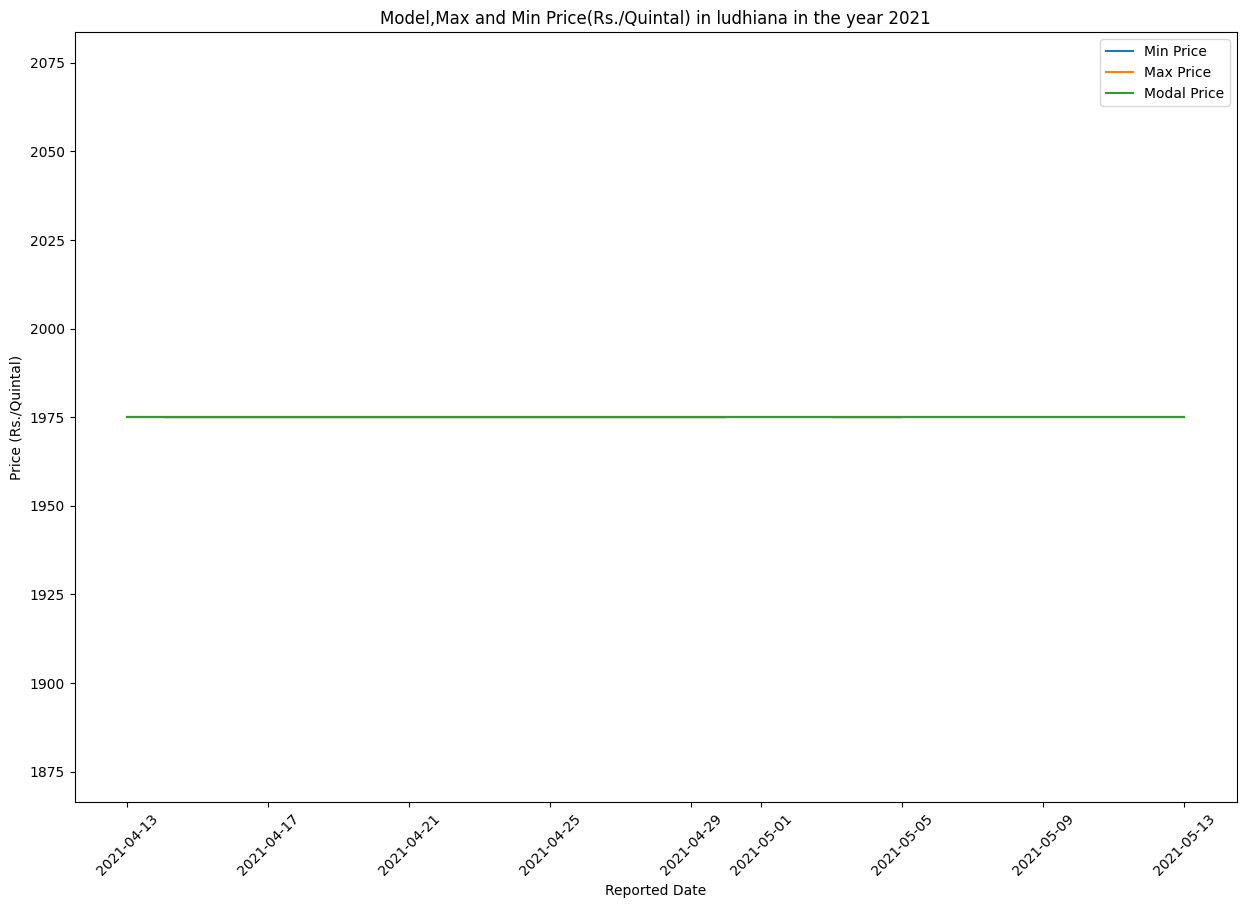

In [109]:
plt.figure(figsize=(15, 10))

# Plot Min Price
sns.lineplot(x='Reported Date', y='Min Price (Rs./Quintal)', data=ludhiana[ludhiana['Reported Date'].dt.year==2021], label='Min Price')

# Plot Max Price
sns.lineplot(x='Reported Date', y='Max Price (Rs./Quintal)', data=ludhiana[ludhiana['Reported Date'].dt.year==2021], label='Max Price')

# Plot Modal Price
sns.lineplot(x='Reported Date', y='Modal Price (Rs./Quintal)', data=ludhiana[ludhiana['Reported Date'].dt.year==2021], label='Modal Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Model,Max and Min Price(Rs./Quintal) in ludhiana in the year 2021')
plt.xlabel('Reported Date')
plt.ylabel('Price (Rs./Quintal)')

# Show legend
plt.legend()

plt.show()

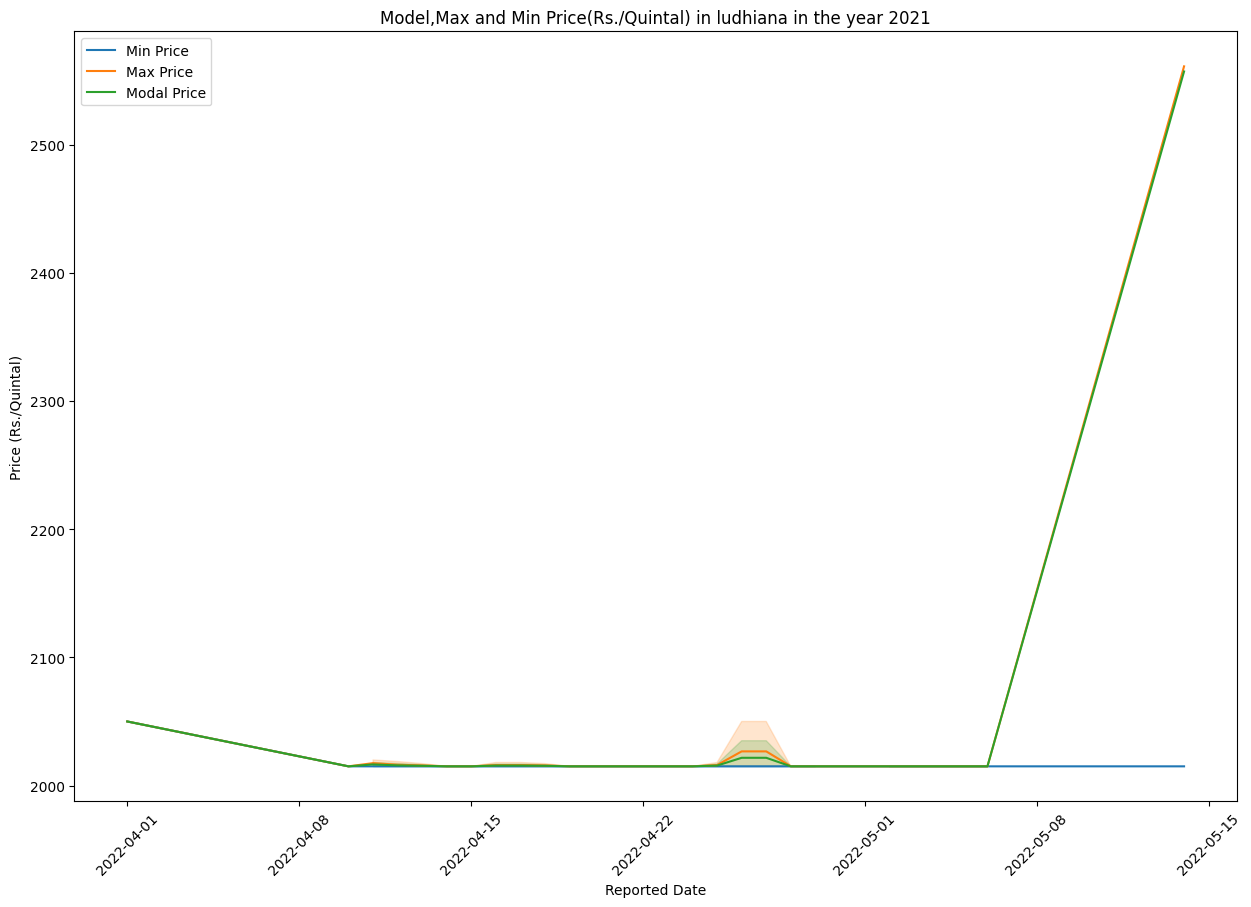

In [111]:
plt.figure(figsize=(15, 10))

# Plot Min Price
sns.lineplot(x='Reported Date', y='Min Price (Rs./Quintal)', data=ludhiana[ludhiana['Reported Date'].dt.year==2022], label='Min Price')

# Plot Max Price
sns.lineplot(x='Reported Date', y='Max Price (Rs./Quintal)', data=ludhiana[ludhiana['Reported Date'].dt.year==2022], label='Max Price')

# Plot Modal Price
sns.lineplot(x='Reported Date', y='Modal Price (Rs./Quintal)', data=ludhiana[ludhiana['Reported Date'].dt.year==2022], label='Modal Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Model,Max and Min Price(Rs./Quintal) in ludhiana in the year 2021')
plt.xlabel('Reported Date')
plt.ylabel('Price (Rs./Quintal)')

# Show legend
plt.legend()

plt.show()

In [112]:
import plotly.express as px
sum_tonnes_market=ludhiana.groupby('Market Name')['Arrivals (Quintals)'].sum().reset_index().sort_values(by='Arrivals (Quintals)')
# Create a bar plot using Plotly
fig = px.bar(sum_tonnes_market, x='Arrivals (Quintals)', y='Market Name', orientation='h',
             title='Sum of Arrivals (Quintals) by Market Name in kapurthala',
             color='Arrivals (Quintals)',
             color_continuous_scale='viridis')
# Add text annotations to the bars
for i in range(len(sum_tonnes_market)):
    fig.add_annotation(x=sum_tonnes_market['Arrivals (Quintals)'][i], y=sum_tonnes_market['Market Name'][i],
                       text=str(sum_tonnes_market['Arrivals (Quintals)'][i]), showarrow=False, xshift=5)

# Show the plot
fig.show()
fig.write_html('Sum of Arrivals (Quintals) by Market Name in ludhiana.html')